# Three-layer planar waveguide #

This code calculates and plots the normalized propagation constant $b$ in a three-layer planar waveguide as a function of the normalized frequency $V$ for the TE and TM propagated modes.

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

In this waveguide, we have, for TE modes:

$$2V\sqrt{1-b} = m\pi + \arctan{\sqrt{\frac{b+\delta}{1-b}}} + \arctan{\sqrt{\frac{b}{1-b}}}$$

And for TM modes:

$$2V\sqrt{1-b} = m\pi + \arctan{\left(p_{c}\sqrt{\frac{b+\delta}{1-b}}\right)} + \arctan{\left(p_{s}\sqrt{\frac{b}{1-b}}\right)}$$

Where:

$$\delta = \frac{{n_{s}}^{2}-{n_{c}}^{2}}{{n_{f}}^{2}-{n_{s}}^{2}}$$

$$p_{c} = \left(\frac{n_{f}}{n_{c}}\right)^{2}$$

$$p_{s} = \left(\frac{n_{f}}{n_{s}}\right)^{2}$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

nf = 3.5
ns = 1.5
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers
lmbd0 = 1.55 * micrometers
k0 = 2 * np.pi / lmbd0

d = (ns**2 - nc**2) / (nf**2 - ns**2) 

pc = (nf/nc)**2
ps = (nf/ns)**2

In [18]:
def Vcm(V):
    arctan = np.arctan(np.sqrt(d))
    V_max = np.max(V)
    m = 0
    Vc = 0
    while True:
        Vc = (m*np.pi + arctan) / 2
        if Vc <= V_max:
            m += 1
        else:
            break
    return m # Return the maximum index of the propagating modes

def V_TE(b):
    arctan1 = np.arctan(np.sqrt((b+d)/(1-b)))
    arctan2 = np.arctan(np.sqrt(b/(1-b)))
    return (arctan1 + arctan2) / (2 * np.sqrt(1-b)) # Return the normalized frequency

def V_TM(b):
    arctan1 = np.arctan(pc * np.sqrt((b+d)/(1-b)))
    arctan2 = np.arctan(ps * np.sqrt(b/(1-b)))
    return (arctan1 + arctan2) / (2 * np.sqrt(1-b)) # Return the normalized frequency

## Ploting the graph ##

To plot the graphs, we will begin by determining the normalized frequencies as functions of the first-mode normalized propagations constant $b_{0}$ of both modes. After that, the other normalized propagation constants are obtained doing: 

$$b_{m} = b_{0}\left(V+\frac{m\pi}{2}\right)$$

Where $m$ is the index of the plotted mode.

Visualizing the first 3 modes.
Asymmetry parameter: δ = 0.12500.


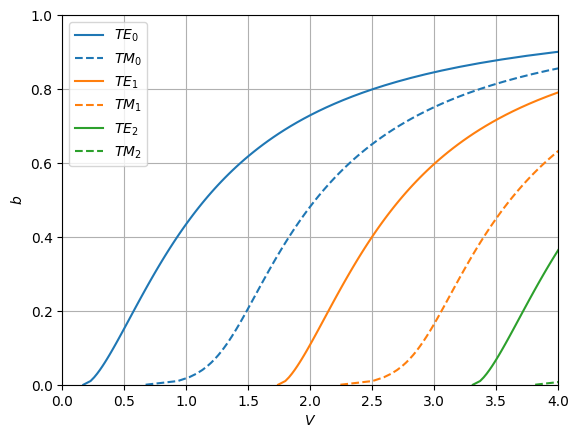

In [19]:
b = np.linspace(0, 0.99, 100) # When b -> 1, V -> infinity

V_te= V_TE(b)
V_tm = V_TM(b)

M = np.min([Vcm(V_te), Vcm(V_tm)]) + 1

v_max = 4 # Maximum value of the normalized frequency that we want to visualize

cmap = plt.get_cmap("tab10")

for m in range(0, M, 1):
    add = m * np.pi / 2
    if add > v_max:
        print(f'Visualizing the first {m} modes.') # If you want to see all modes, this part needs a little change
        break

    color = cmap(m)

    plt.plot(V_te + add, b, label=f'$TE_{m}$', color = color)
    plt.plot(V_tm + add, b, label=f'$TM_{m}$', linestyle='--', color = color)

plt.xlabel(r'$V$')
plt.ylabel(r'$b$')
plt.xlim(0,v_max)
plt.ylim(0,1)
plt.grid(True)
plt.legend(loc = 'best')
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()